# **CSCI 4967 Projects in AI/ML HW1**

**Spring 2024**

*Author: Yuming (Tao) Xie*

# &nbsp;Task 1
The machine learning problem I want to solve involves predicting credit card application approval based on features like credit score, income, and employment status. Logistic Regression is chosen for several reasons:

1. The binary outcome aligns with the model, it offers interpretability by indicating predictor relevance and direction.
2. It is computationally efficient for large datasets, easier to implement and less likely lead to overfitting than complex models.
3. It provides sound and complete results.

# 0.&nbsp;Using GPU for Accelerating Process If Necessary

In [1]:
# test if GPU is running
import tensorflow as tf
tf.test.gpu_device_name()
# check which GPU is running
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15372345998252969782
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10271076782170227328
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# 1.&nbsp;Import the Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# &nbsp;Task 2

# 2.&nbsp;Download, Load, and Clean the Dataset

In [4]:
# Load the data into a pandas DataFrame
df = pd.read_csv('/content/crx.data', header=None)

The data set from UCI (https://archive.ics.uci.edu/dataset/27/credit+approval) contains 690 information cases and 16 variables (0-15). The first 15 variables (0-14) represent different attributes of each case, and the 16th variable (15) represents the result of the credit card application (′+′ represents the application was approved and ′−′ represents the application was rejected). The
variables for this dataset are composed of continuous, letters, and symbols (class attribute). The table for each variable and the corresponding attribute is as below:

In [5]:
# Display the first 5 rows of the dataframe
print(df.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


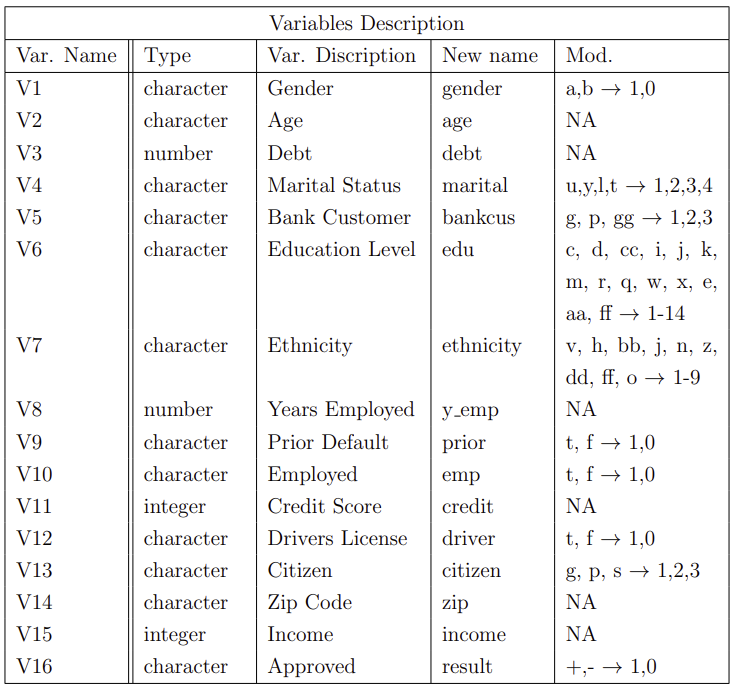

Now check and handle the missing data:

In [6]:
# Replace all "?" with NaN
df = df.replace('?', np.nan)

# Check the missing data
print(df.isnull().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


The data set contains missing values over 7 of the 16 variables. These missing values
are found in 37 of the 690 cases representing about 5.36% of the data. The missing
values are found in the following attributes: 0(Age), 1(Gender), 3(Marital Status),
4(Bank Customer), 5(Education Level), 6(Ethnicity) and 13(Zip Code). Note
0(age) is the only continuous type and the rest are letters type. There are various
methods to handle these missing values which can range from deleting the observation
reporting the missing data to replacing the missing data with the average of the feature
in which the data is missing. For this data set, I use the mean values to replace the
missing values in Age attribute and delete the rest of the observations which reports
the missing data.

In [7]:
# Handle the missing data, replace NaN in 'V2' with mean
# Make sure 'V2' is numeric
df[1] = pd.to_numeric(df[1], errors='coerce')

# Replace NaN in 'V2' with mean
df[1].fillna(df[1].mean(), inplace=True)

#remove the rest of the missing values
df = df.dropna()

# 3.&nbsp;Exploratory Data Analysis

Data Preprocessing: Since all the continuous attributes are measured with different scales along with high
variances, this may affect the analysis by finding improper correlation between each
pair of attributes. Thus in order to get better and more accurate analysis on the
continuous attributes, 1(Age), 2(Debt), 7(Years Employed), 10(Credit Scores),
and 14(Income) are normalized using the Min-Max Scaling.

In [8]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = [1, 2, 7, 10, 14]

# Apply the scaler to the columns
for column in columns_to_normalize:
    df[column] = scaler.fit_transform(df[[column]])

Data Summrization and Visualization

In [9]:
# Display the summary statistics of the dataframe
print(df.describe())

               1           2           7           10          14
count  664.000000  664.000000  664.000000  664.000000  664.000000
mean     0.281823    0.171403    0.079361    0.036841    0.010036
std      0.186344    0.178735    0.118162    0.073667    0.052112
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.141587    0.035714    0.005789    0.000000    0.000000
50%      0.235397    0.101964    0.035088    0.000000    0.000050
75%      0.380952    0.254375    0.096491    0.044776    0.003970
max      1.000000    1.000000    1.000000    1.000000    1.000000


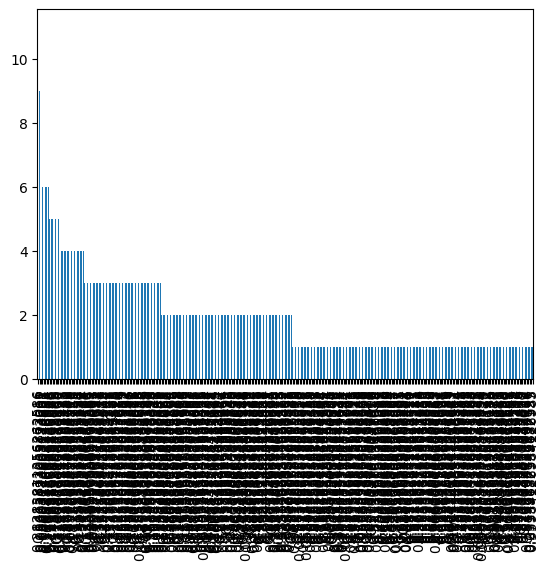

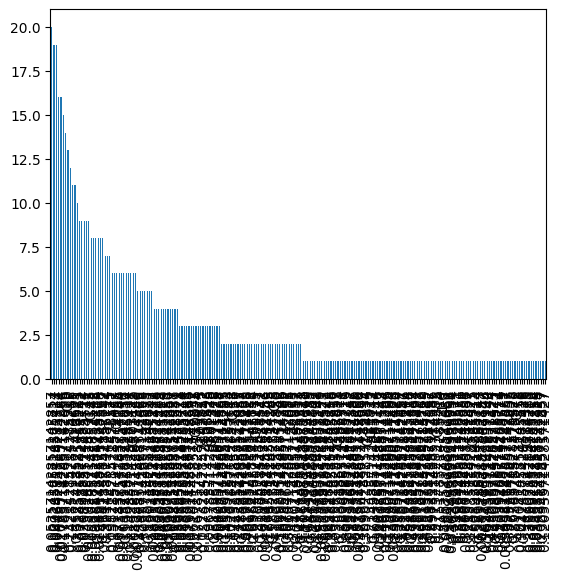

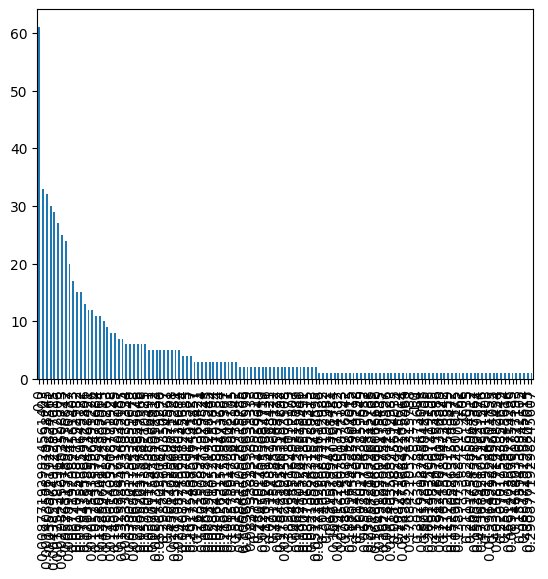

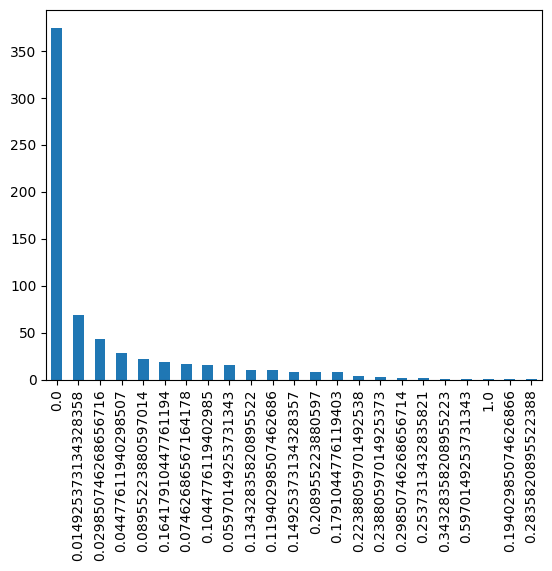

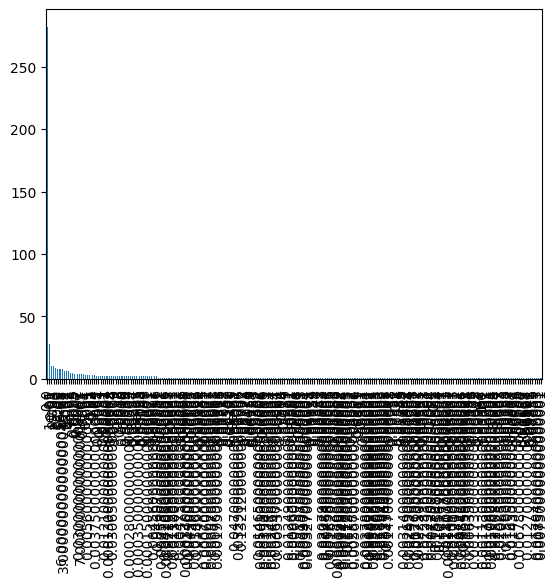

In [10]:
# Data visualization for continuous variables
continuous_vars = [1, 2, 7, 10, 14]
for var in continuous_vars:
    df[var].value_counts().plot(kind='bar')
    plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       664 non-null    int64  
 1   1       664 non-null    float64
 2   2       664 non-null    float64
 3   3       664 non-null    int64  
 4   4       664 non-null    int64  
 5   5       664 non-null    int64  
 6   6       664 non-null    int64  
 7   7       664 non-null    float64
 8   8       664 non-null    int64  
 9   9       664 non-null    int64  
 10  10      664 non-null    float64
 11  11      664 non-null    int64  
 12  12      664 non-null    int64  
 13  13      664 non-null    int64  
 14  14      664 non-null    float64
 15  15      664 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 88.2 KB
None


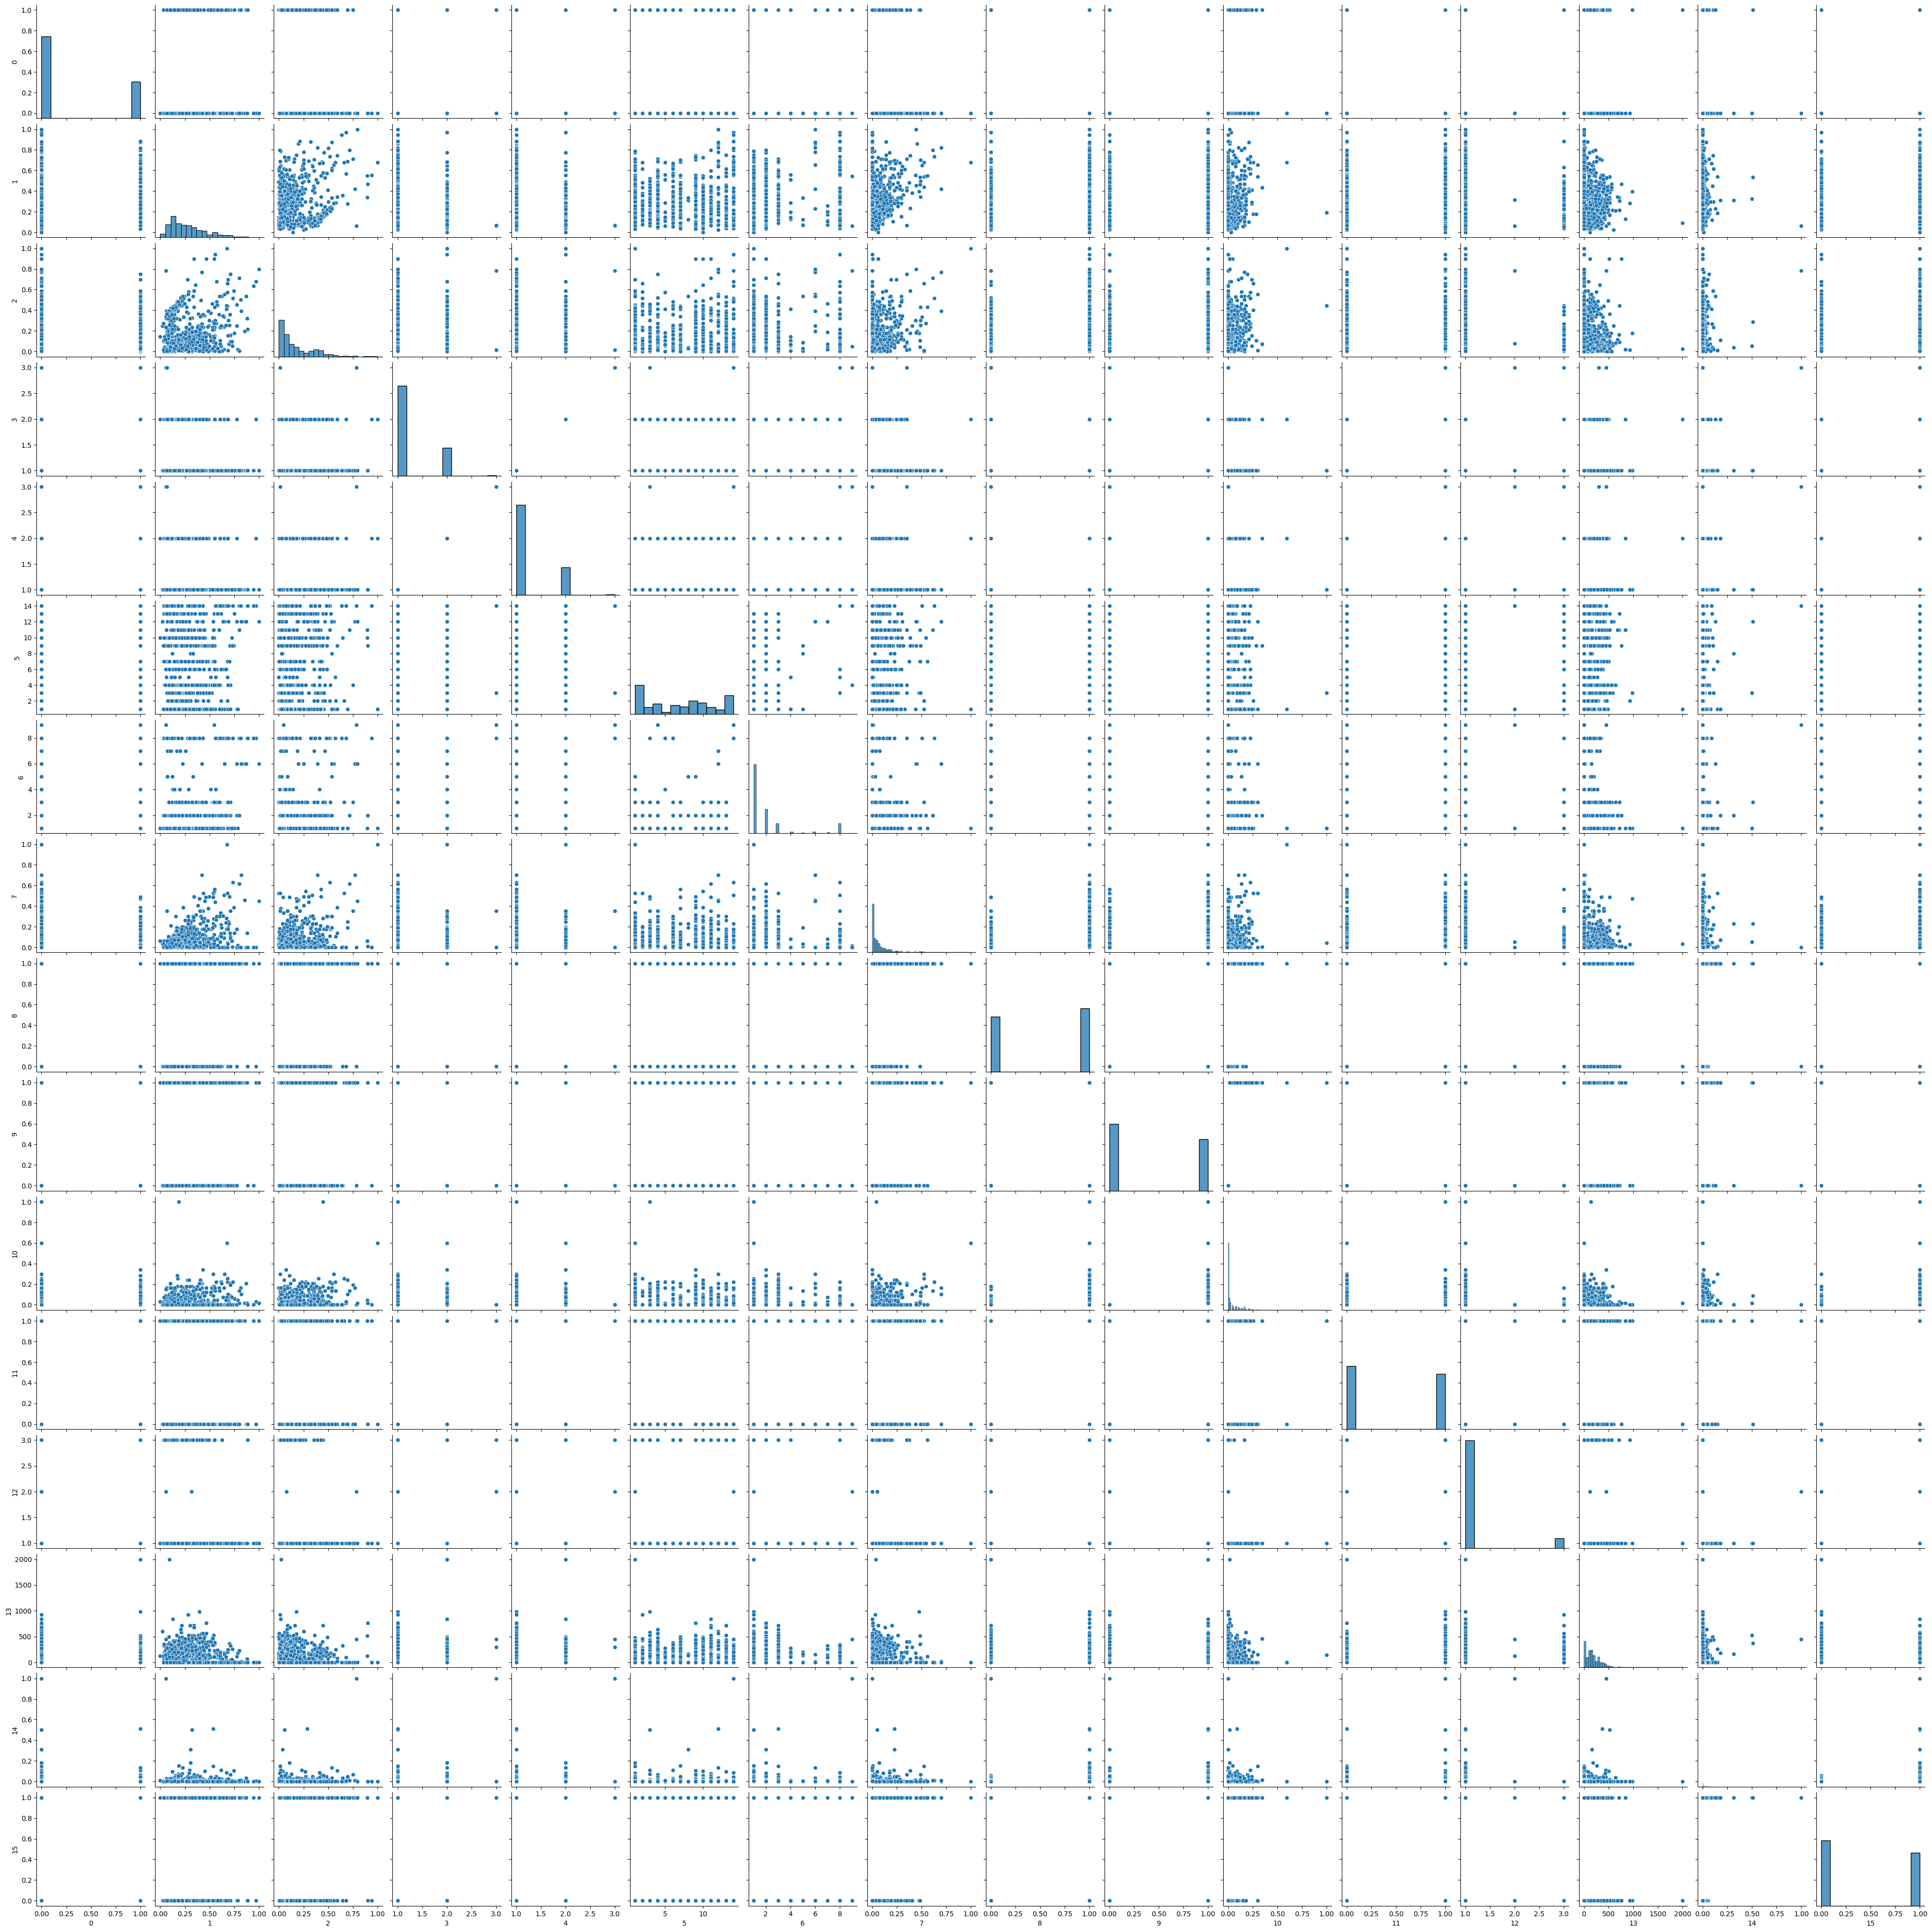

In [11]:
# Data visualization for discrete variables
df[0] = np.where(df[0] == 'a', 1, 0)
df[8] = np.where(df[8] == 't', 1, 0)
df[9] = np.where(df[9] == 't', 1, 0)
df[11] = np.where(df[11] == 't', 1, 0)

df[3] = df[3].map({'u': 1, 'y': 2, 'l': 3, '6': 4})
df[4] = df[4].map({'g': 1, 'p': 2, 'gg': 3})
df[5] = df[5].map({'c': 1, 'd': 2, 'cc': 3, 'i': 4, 'j': 5, 'k': 6, 'm': 7, 'r': 8, 'q': 9, 'w': 10, 'x': 11, 'e': 12, 'aa': 13, 'ff': 14})
df[6] = df[6].map({'v': 1, 'h': 2, 'bb': 3, 'j': 4, 'n': 5, 'z': 6, 'dd': 7, 'ff': 8, 'o': 9})
df[12] = df[12].map({'g': 1, 'p': 2, 's': 3})
df[15] = df[15].map({'+': 1, '-': 0})

# Convert to numeric
for col in [3, 4, 5, 6, 12, 13, 15]:
    df[col] = pd.to_numeric(df[col])

# Display structure of df
print(df.info())

# Pairplot
sns.pairplot(df)

# &nbsp;Task 3 & 4

# 4.&nbsp;Logistic Regression Model

In [12]:
# Split the data into train and test set
train, test = train_test_split(df, test_size=0.3)
X_train = train.drop(15, axis=1)
y_train = train[15]

In [13]:
class LR:

    def __init__(self, learn_rate = 0.01, num_itr = 1000):
        self.learn_rate = learn_rate
        self.num_itr = num_itr
        self.coeffs = None
        self.intercept = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def loss(self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def train(self, X, y, method):
        num_samples, num_features = X.shape
        self.coeffs, self.intercept = np.zeros(num_features), 0
        if method == 'bgd':
            # Batch Gradient Descent
            for _ in range(self.num_itr):
                model_tmp = np.dot(X, self.coeffs) + self.intercept
                y_hat = self.sigmoid(model_tmp)
                # Derivative of the cost function with respect to the parameters
                dw = (1 / num_samples) * np.dot(X.T, (y_hat - y))
                db = (1 / num_samples) * np.sum(y_hat - y)
                self.coeffs -= self.learn_rate * dw
                self.intercept -= self.learn_rate * db
        elif method == 'sgd':
            # Stochastic Gradient Descent
            for _ in range(self.num_itr):
                for i in range(num_samples):
                    xi = X.iloc[i,:]; yi = y.iloc[i]
                    model_tmp = np.dot(xi, self.coeffs) + self.intercept
                    y_hat = self.sigmoid(model_tmp)
                    # Derivative of the cost function with respect to the parameters
                    dw = xi * (y_hat - yi); db = y_hat - yi
                    self.coeffs -= self.learn_rate * dw
                    self.intercept -= self.learn_rate * db
        elif method == 'adam':
            # Adam
            b1 = 0.9; b2 = 0.999; eps = 1e-8
            m, v = np.zeros_like(self.coeffs), np.zeros_like(self.coeffs)
            for _ in range(self.num_itr):
                model_tmp = np.dot(X, self.coeffs) + self.intercept
                y_hat = self.sigmoid(model_tmp)
                dw = (1 / num_samples) * np.dot(X.T, (y_hat - y))
                db = (1 / num_samples) * np.sum(y_hat - y)
                m = b1 * m + (1 - b1) * dw; v = b2 * v + (1 - b2) * dw**2
                m_hat = m / (1 - b1); v_hat = v / (1 - b2)
                self.coeffs -= self.learn_rate * m_hat / (np.sqrt(v_hat) + eps)
                self.intercept -= self.learn_rate * db
        elif method == 'adagrad':
            # Adagrad
            eps = 1e-8; v = np.zeros_like(self.coeffs)
            for _ in range(self.num_itr):
                model_tmp = np.dot(X, self.coeffs) + self.intercept
                y_hat = self.sigmoid(model_tmp)
                dw = (1 / num_samples) * np.dot(X.T, (y_hat - y))
                db = (1 / num_samples) * np.sum(y_hat - y)
                v += dw**2
                self.coeffs -= self.learn_rate * dw / (np.sqrt(v) + eps)
                self.intercept -= self.learn_rate * db
        else:
            raise ValueError("ERROR: Invalid method!")

    def predict(self, X):
        model_tmp = np.dot(X, self.coeffs) + self.intercept
        y_hat = self.sigmoid(model_tmp)
        return [1 if i > 0.5 else 0 for i in y_hat], y_hat

    def variable_importance(self):
        return self.coeffs

    def roc_curve(self, X, y):
        tmp, y_hat = self.predict(X)
        fpr, tpr, _ = roc_curve(y, y_hat)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

In [14]:
# logistic Using Batch Gradient Descent
model_bgd = LR()
model_bgd.train(X_train, y_train, 'bgd')

In [15]:
# predict
y_hat_train, tmp = model_bgd.predict(X_train)

In [16]:
# confusion matrix
print(confusion_matrix(y_train, y_hat_train))

[[257   6]
 [162  39]]


In [17]:
# variable importance
print("Variable Importance: ", model_bgd.variable_importance())

Variable Importance:  [ 0.03671802  0.14825297  0.14938856 -0.30528034 -0.30528034  0.0885485
 -0.63676449  0.1673337   1.67349735  1.03945789  0.13514011  0.18152794
 -0.07478389 -0.79343708  0.05189568]


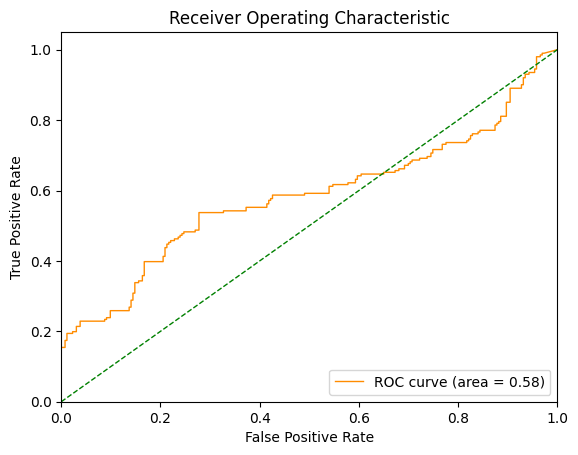

In [18]:
# ROC curve
model_bgd.roc_curve(X_train, y_train)

In [19]:
# logistic Using Stochastic Gradient Descent
model_sgd = LR()
model_sgd.train(X_train, y_train, 'sgd')

In [20]:
# predict
y_hat_train, tmp = model_sgd.predict(X_train)

In [21]:
# confusion matrix
print(confusion_matrix(y_train, y_hat_train))

[[ 54 209]
 [  4 197]]


In [22]:
# variable importance
print("Variable Importance: ", model_sgd.variable_importance())

Variable Importance:  0     -57.136206
1      19.120035
2      19.921550
3     -77.678406
4     -77.678406
5      -2.045565
6     -15.260861
7      31.773055
8     306.954943
9     170.934563
10     23.408112
11    -25.477919
12      7.097454
13      3.001564
14     22.158304
Name: 183, dtype: float64


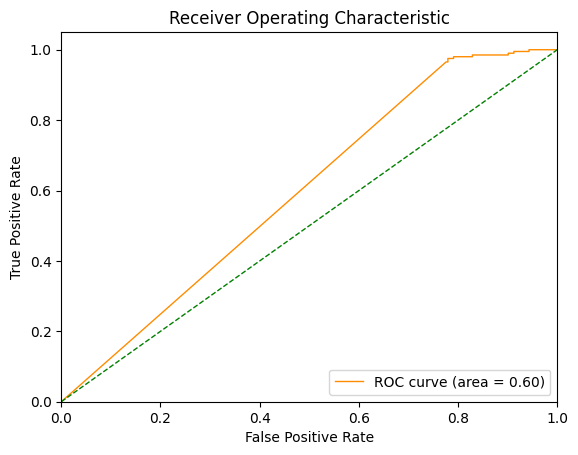

In [23]:
# ROC curve
model_sgd.roc_curve(X_train, y_train)

In [24]:
# logistic Using Adam
model_adam = LR()
model_adam.train(X_train, y_train, 'adam')

In [25]:
# predict
y_hat_train, tmp = model_adam.predict(X_train)

In [26]:
# confusion matrix
print(confusion_matrix(y_train, y_hat_train))

[[228  35]
 [ 20 181]]


In [27]:
# variable importance
print("Variable Importance: ", model_adam.variable_importance())

Variable Importance:  [-4.35681409e-01 -1.30062730e-01  6.31118240e-01 -6.42462232e-01
 -6.42462232e-01 -2.46817720e-02 -1.42507094e-01  1.93332472e+00
  3.14280078e+00  1.06088023e+00  2.69664902e+00 -3.56982281e-01
 -1.91820902e-01 -1.46896951e-03  5.28220806e+00]


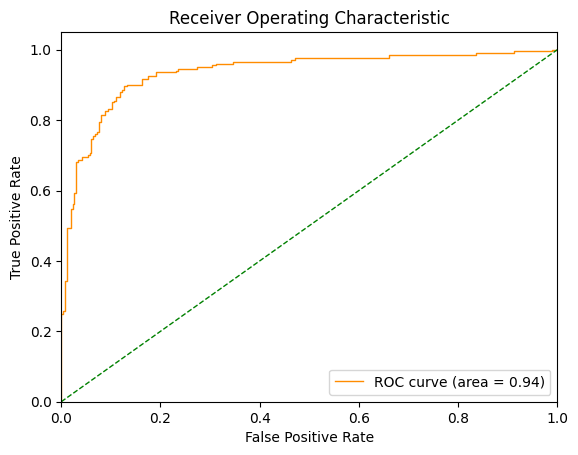

In [28]:
# ROC curve
model_adam.roc_curve(X_train, y_train)

In [29]:
# logistic Using Adagrad
model_adagrad = LR()
model_adagrad.train(X_train, y_train, 'adagrad')

In [30]:
# predict
y_hat_train, tmp = model_adagrad.predict(X_train)

In [31]:
# confusion matrix
print(confusion_matrix(y_train, y_hat_train))

[[242  21]
 [ 54 147]]


In [32]:
# variable importance
print("Variable Importance: ", model_adagrad.variable_importance())

Variable Importance:  [-0.00809806  0.45186363  0.50745761 -0.27188371 -0.27188371  0.01234433
 -0.14933179  0.54715115  0.56607568  0.53537399  0.55075794  0.14365431
 -0.08586981 -0.00089379  0.59574452]


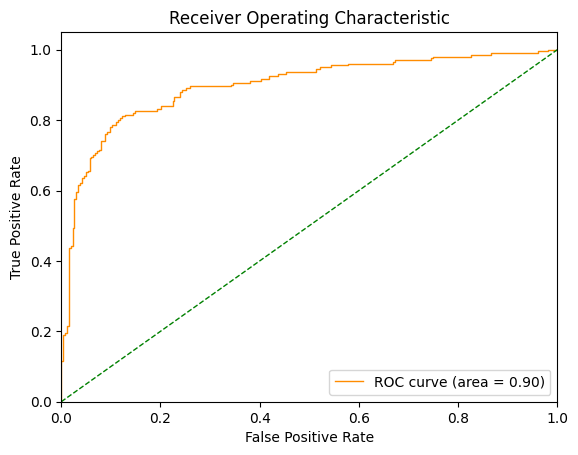

In [33]:
# ROC curve
model_adagrad.roc_curve(X_train, y_train)

# &nbsp;Conclusion

Based on the comparison among all 4 Confusion Matrix and ROC evaluations, the Adam model performs best, followed by the Adagrad model, then the SGD model, and the BGD model performs worst.

The reasons why we should use optimization algorithms include:

1. **Accuracy**: Optimization algorithms like Adam and Adagrad adjust the learning rate adaptively for each parameter, which lead to more accurate models as they can converge faster.

2. **Efficiency**: Optimization algorithms can significantly speed up the learning process.

3. **Robustness**: Optimization algorithms are more robust to the initial starting point, learning rate, and other hyperparameters.